### PREP TEXT

In [1]:
from bertopic import BERTopic

with open("Back To The Future.txt", "r", encoding="utf-8") as f:
    screenplay_text = f.read()

print(screenplay_text[:100])

BACK TO THE FUTURE

Written by

Robert Zemeckis and Bob Gale

FOURTH DRAFT

Revised 10-12-84

with p


In [25]:
# clean text
cleaned_words = (screenplay_text.lower()
                 .replace("doc", "").replace("brown", "")
                 .replace("marty", "").replace("mcfly", "")
                 .replace("george", "").replace("lorraine", "")
                 .replace("biff", "").replace("linda", "").replace("joey", "")
                 .replace("strickland", "").replace("mr", "")
                 .replace("ext", "").replace("int", "").replace("cut", "").replace("next", "")
                 .replace("dave", "").replace("stella", "").replace("sam", "").replace("milton", "")
                 .replace("einstein", "")
                 .replace("\n", " ")
                )

cleaned_words = [word.strip() for word in cleaned_words.lower().split(" ") if word.strip() != ""]

# stop words
import nltk
from nltk.corpus import stopwords

# Load English stop words
stop_words = set(stopwords.words('english'))

# Filter out stop words from the cleaned word list
filtered_words = [word for word in cleaned_words if word not in stop_words]

print(f"Original words: {len(cleaned_words)}, Filtered words: {len(filtered_words)}")

Original words: 22260, Filtered words: 12876


In [46]:
# chunks
chunk_size = 20
chunks = [" ".join(filtered_words[i:i+chunk_size]) for i in range(0, len(filtered_words), chunk_size)]
print(f"Total chunks: {len(chunks)}")

Total chunks: 644


### RUN BERTOPIC

In [47]:
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=3,
                               min_samples=1,
                               cluster_selection_epsilon=0.1)

from umap import UMAP

umap_model = UMAP(n_components=10, n_neighbors=15, min_dist=0.05, metric='cosine')

topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)
topics, probs = topic_model.fit_transform(chunks)

# View the most common topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,125,-1_pulls_look_well_dixon,"[pulls, look, well, dixon, turns, its, get, bo...",[suddenly starts barking something einie turns...
1,0,14,0_table_loaf_meat_dinner,"[table, loaf, meat, dinner, tennis, healthy, e...",[227 dining room — day 227 seated dining room ...
2,1,13,1_anger_punch_stomach_fighter,"[anger, punch, stomach, fighter, throws, scare...",[want hit stomach youre gonna hurt give punch ...
3,2,13,2_dad_insurance_uncle_dont,"[dad, insurance, uncle, dont, ff, understand, ...",[insurance pay insurance it’s car insurance pa...
4,3,13,3_snapshot_insert_fading_flyer,"[snapshot, insert, fading, flyer, brother, ima...",[worry ill take care lightning take care old m...
...,...,...,...,...,...
89,88,3,88_record_dj_radio_collection,"[record, dj, radio, collection, week, records,...",[week gives free beer gives total access recor...
90,89,3,89_clothes_bag_filled_unwilling,"[clothes, bag, filled, unwilling, height, targ...",[taping oh — mustnt forget luggage grabs suitc...
91,90,3,90_howard_window_combs_neighbor,"[howard, window, combs, neighbor, handful, hai...",[laughs hands five closes door sighs walks aro...
92,91,3,91_lying_bedroom_stirs_bed,"[lying, bedroom, stirs, bed, asleep, 1230, clo...",[clock ’s nightstand 16-a it’s almost 1230 cam...


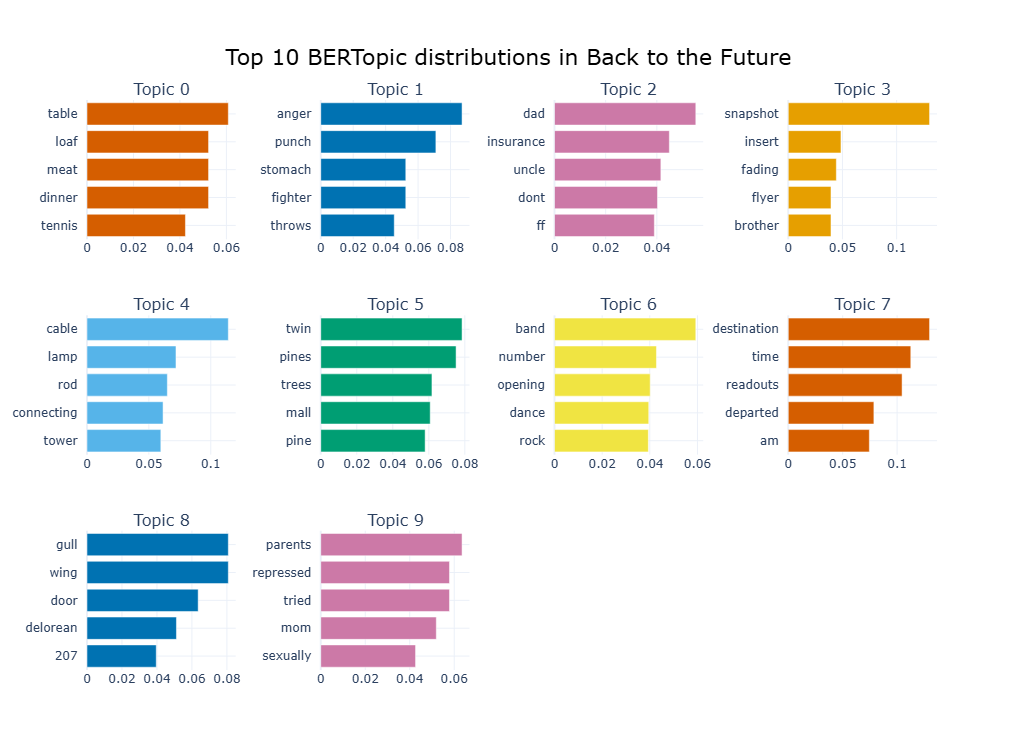

In [49]:
import matplotlib.pyplot as plt

fig = topic_model.visualize_barchart(top_n_topics=10)
fig.update_layout(title_text="Top 10 BERTopic distributions in Back to the Future", title_x=0.5)  # Centered title
fig.show()

In [40]:
topic_model.get_topic_info(n_words=20)  # Increase from default (10)


TypeError: BERTopic.get_topic_info() got an unexpected keyword argument 'n_words'